# EDA

## Setup

In [25]:
from sqlalchemy import create_engine

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load data

In [ ]:
server_dir = '/Users/jamieinfinity/Dropbox/Projects/WorldLine/worldline-wgt/server/'
cfg_file = server_dir + 'config/api_params.cfg'
db_dir = server_dir + 'db/'
backups_dir = db_dir + 'backups/'
db_name = 'worldline'
db_ext = '.db'
db_file_name = db_dir + db_name + db_ext

In [5]:
engine = create_engine('sqlite:///'+db_file_name)
with engine.connect() as conn, conn.begin():
    db_df = pd.read_sql_table('fitness', conn, index_col='Date', parse_dates=['Date'])

In [16]:
data_df = db_df[db_df.index>'2015-09-15'].copy()

## EDA

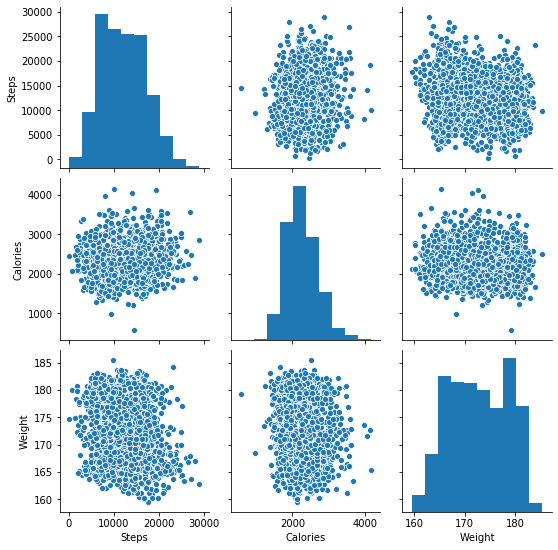

In [28]:
sns.pairplot(data_df[['Steps','Calories','Weight']])
plt.show()

In [167]:
period = '1w'

eda_df = pd.DataFrame(data_df.Weight.resample(period, label='right').mean()).rename({'Weight':'w0'},axis=1)
eda_df['wm1'] = eda_df.w0.shift(1)
eda_df['wp1'] = eda_df.w0.shift(-1)
eda_df['Dw0'] = eda_df['w0']-eda_df['wm1']
eda_df['Dwp1'] = eda_df['wp1']-eda_df['w0']
eda_df['s0'] = data_df.Steps.resample(period, label='right').mean()
eda_df['c0'] = data_df.Calories.resample(period, label='right').mean()
eda_df['steps_class'] = 'steps_low'
eda_df.loc[(eda_df.s0>=8000)&(eda_df.s0<12000), 'steps_class'] = 'steps_medium'
eda_df.loc[(eda_df.s0>=12000), 'steps_class'] = 'steps_high'
eda_df['weight_class'] = 'weight_I'
eda_df.loc[(eda_df.w0>=165)&(eda_df.w0<170), 'weight_class'] = 'weight_II'
eda_df.loc[(eda_df.w0>=170)&(eda_df.w0<175), 'weight_class'] = 'weight_III'
eda_df.loc[(eda_df.w0>=175)&(eda_df.w0<180), 'weight_class'] = 'weight_IV'
eda_df.loc[(eda_df.w0>=180), 'weight_class'] = 'weight_V'

In [168]:
eda_df.head()

,w0,wm1,wp1,Dw0,Dwp1,s0,c0,steps_class,weight_class
Date,,,,,,,,,
2015-09-20,182.740000,NaN,180.928571,NaN,-1.811429,13891.000000,2185.400000,steps_high,weight_V
2015-09-27,180.928571,182.740000,181.000000,-1.811429,0.071429,11040.428571,2300.857143,steps_medium,weight_V
2015-10-04,181.000000,180.928571,181.224131,0.071429,0.224131,10344.428571,2463.571429,steps_medium,weight_V
2015-10-11,181.224131,181.000000,180.000000,0.224131,-1.224131,11046.714286,2289.571429,steps_medium,weight_V
2015-10-18,180.000000,181.224131,179.071429,-1.224131,-0.928571,10963.428571,1921.714286,steps_medium,weight_V


**NOTE**
The graphs below are made with raw measurements (avg'd over a week). Things might look different if you first disentangled the large daily fluctuations due to wet/dry mass dynamics (i.e. urine/fecal mass and hydration/sweating). 

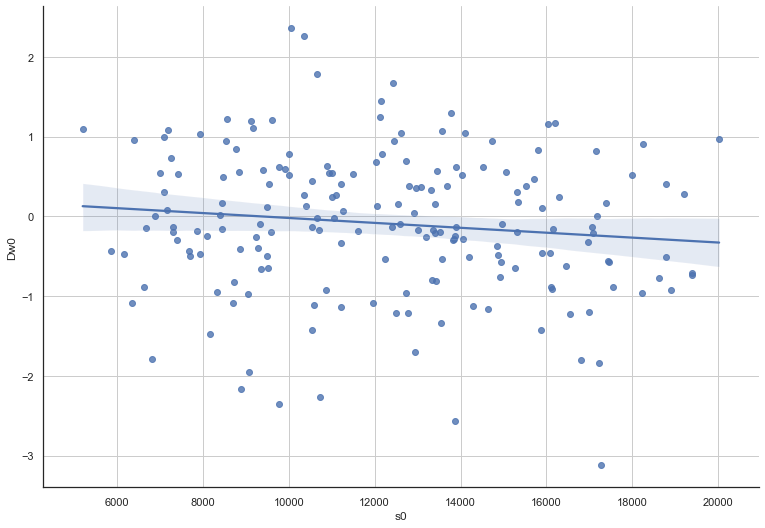

In [176]:
Dw = 'Dw0'

foo = eda_df[['s0', Dw, 'weight_class']].copy()
foo = foo[foo.weight_class.isin(['weight_II', 'weight_III', 'weight_IV'])].copy()

sns.set_style("white")

g = sns.lmplot('s0', Dw, data=foo)
g.fig.set_figwidth(12)
g.fig.set_figheight(8)

plt.grid()
plt.show()

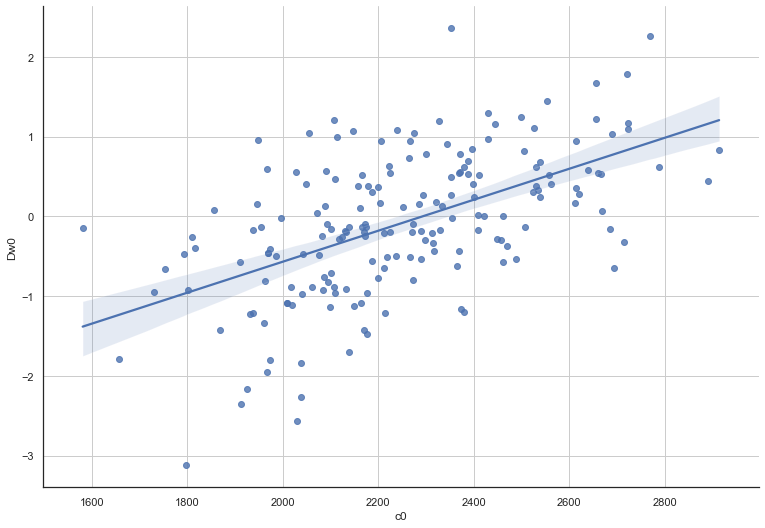

In [172]:
Dw = 'Dw0'

foo = eda_df[['c0', Dw, 'weight_class']].copy()
foo = foo[foo.weight_class.isin(['weight_II', 'weight_III', 'weight_IV'])].copy()

sns.set_style("white")

g = sns.lmplot('c0', Dw, data=foo)
g.fig.set_figwidth(12)
g.fig.set_figheight(8)

plt.grid()
plt.show()

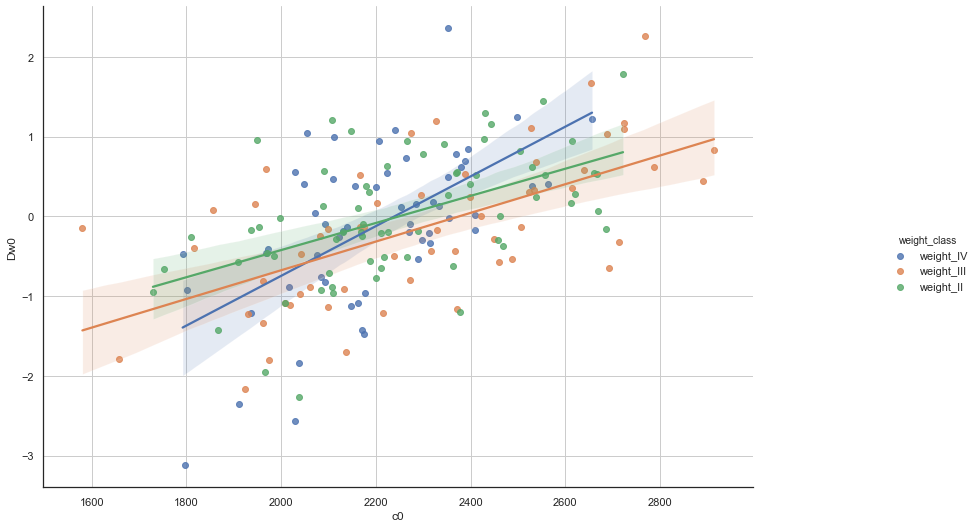

In [173]:
Dw = 'Dw0'

foo = eda_df[['c0', Dw, 'weight_class']].copy()
foo = foo[foo.weight_class.isin(['weight_II', 'weight_III', 'weight_IV'])].copy()

sns.set_style("white")

g = sns.lmplot('c0', Dw, data=foo, hue='weight_class')
g.fig.set_figwidth(15)
g.fig.set_figheight(8)

plt.grid()
plt.show()

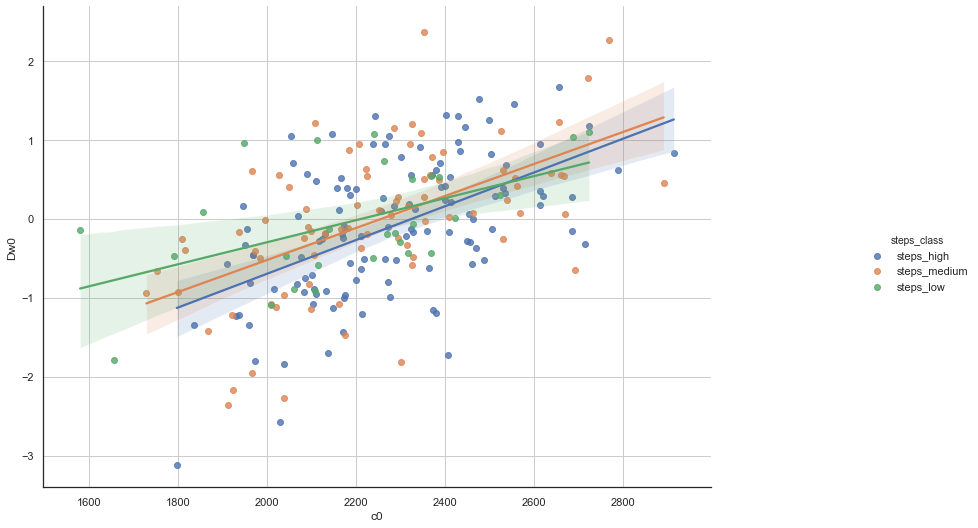

In [174]:
foo = eda_df[['c0', 'Dw0', 'steps_class']].copy()

g = sns.lmplot('c0', 'Dw0', data=foo, hue='steps_class')
g.fig.set_figwidth(15)
g.fig.set_figheight(8)

plt.grid()
plt.show()

In [99]:
eda_df.weight_class.value_counts()

weight_II     68
weight_III    59
weight_IV     58
weight_V      31
weight_I      18
Name: weight_class, dtype: int64

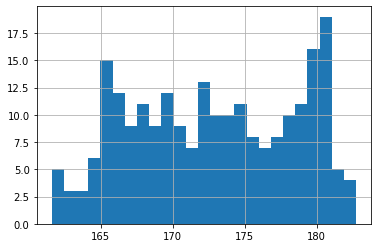

In [105]:
eda_df.w0.hist(bins=25)